In [1]:
%matplotlib inline

import shm
import numpy
import networkx
import matplotlib
import seaborn as sns
import pandas as pd
import pickle
import pymc3 as pm

In [18]:
import arviz as az
import shm.plot as sp
import matplotlib.pyplot as plt
from shm.models.hlm import HLM

In [35]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 3)

Populating the interactive namespace from numpy and matplotlib


In [3]:
trace_dir = "../results/small_simple_model_trace"
readout_file = "../data_raw/easy_simulated_data/small-simulated_data.tsv"
graph_file = "../data_raw/easy_simulated_data/small-graph.tsv"
data_file = "../data_raw/easy_simulated_data/small-data.pickle"

In [4]:
def _read_graph(infile, data):    
    genes = numpy.unique(data["gene"].values)
    G = networkx.read_edgelist(
      infile,
      delimiter="\t",
      data=(('weight', float),),
      nodetype=str)
    G = G.subgraph(numpy.sort(genes))
    data = data[data.gene.isin(numpy.sort(G.nodes()))]
    return G, data

In [9]:
with open(data_file, "rb") as fh:    
    data = pickle.load(fh)

In [6]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


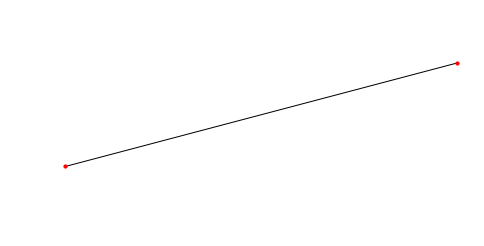

In [36]:
networkx.draw(graph, node_size=10)

In [48]:
with HLM(readout) as model:
    trace = pm.load_trace(trace_dir, model = model.model)

Building simple hierarchical model


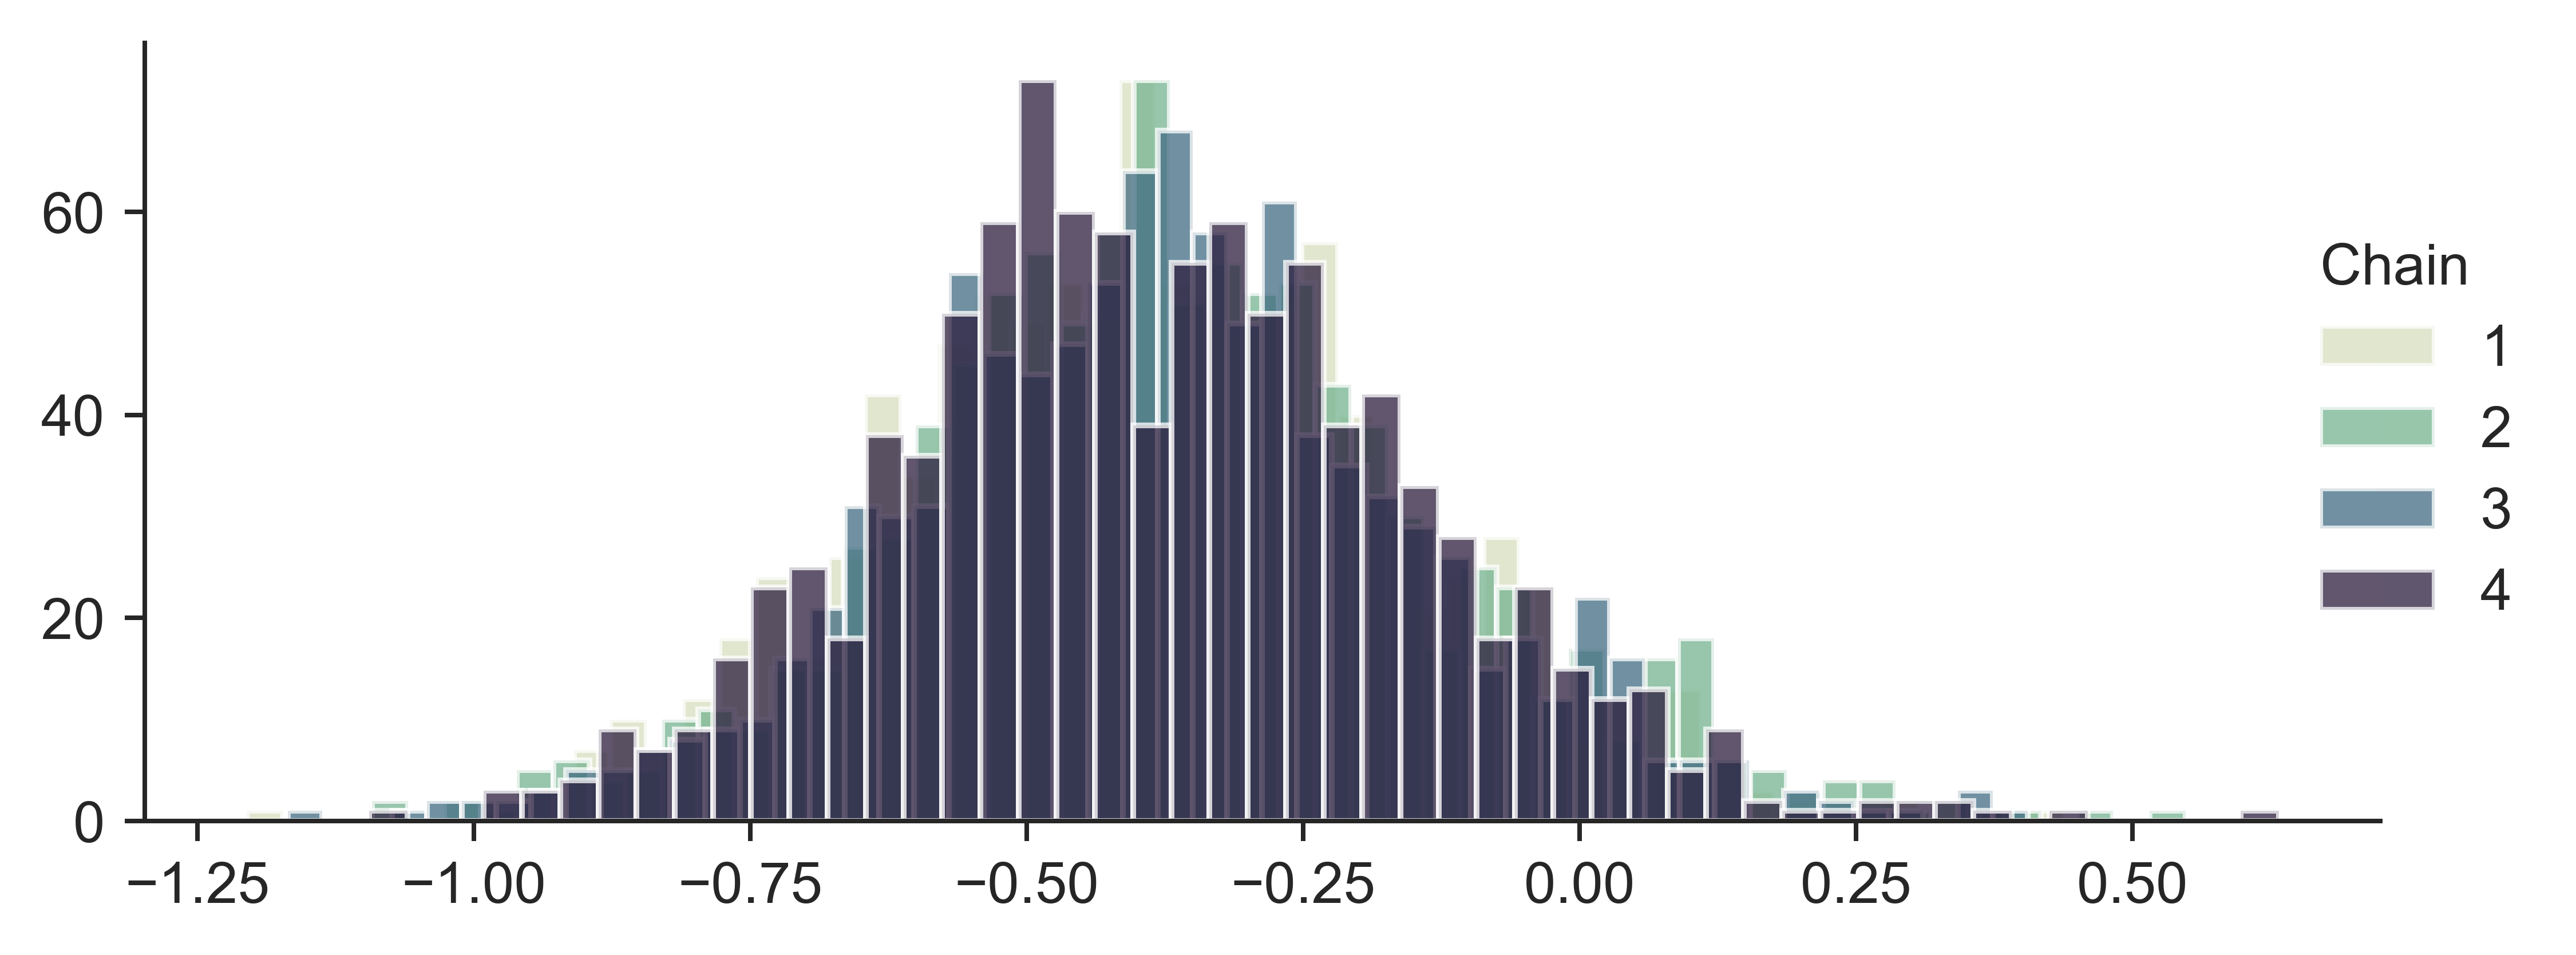

In [49]:
sp.plot_hist(trace, "gamma", 0, "");

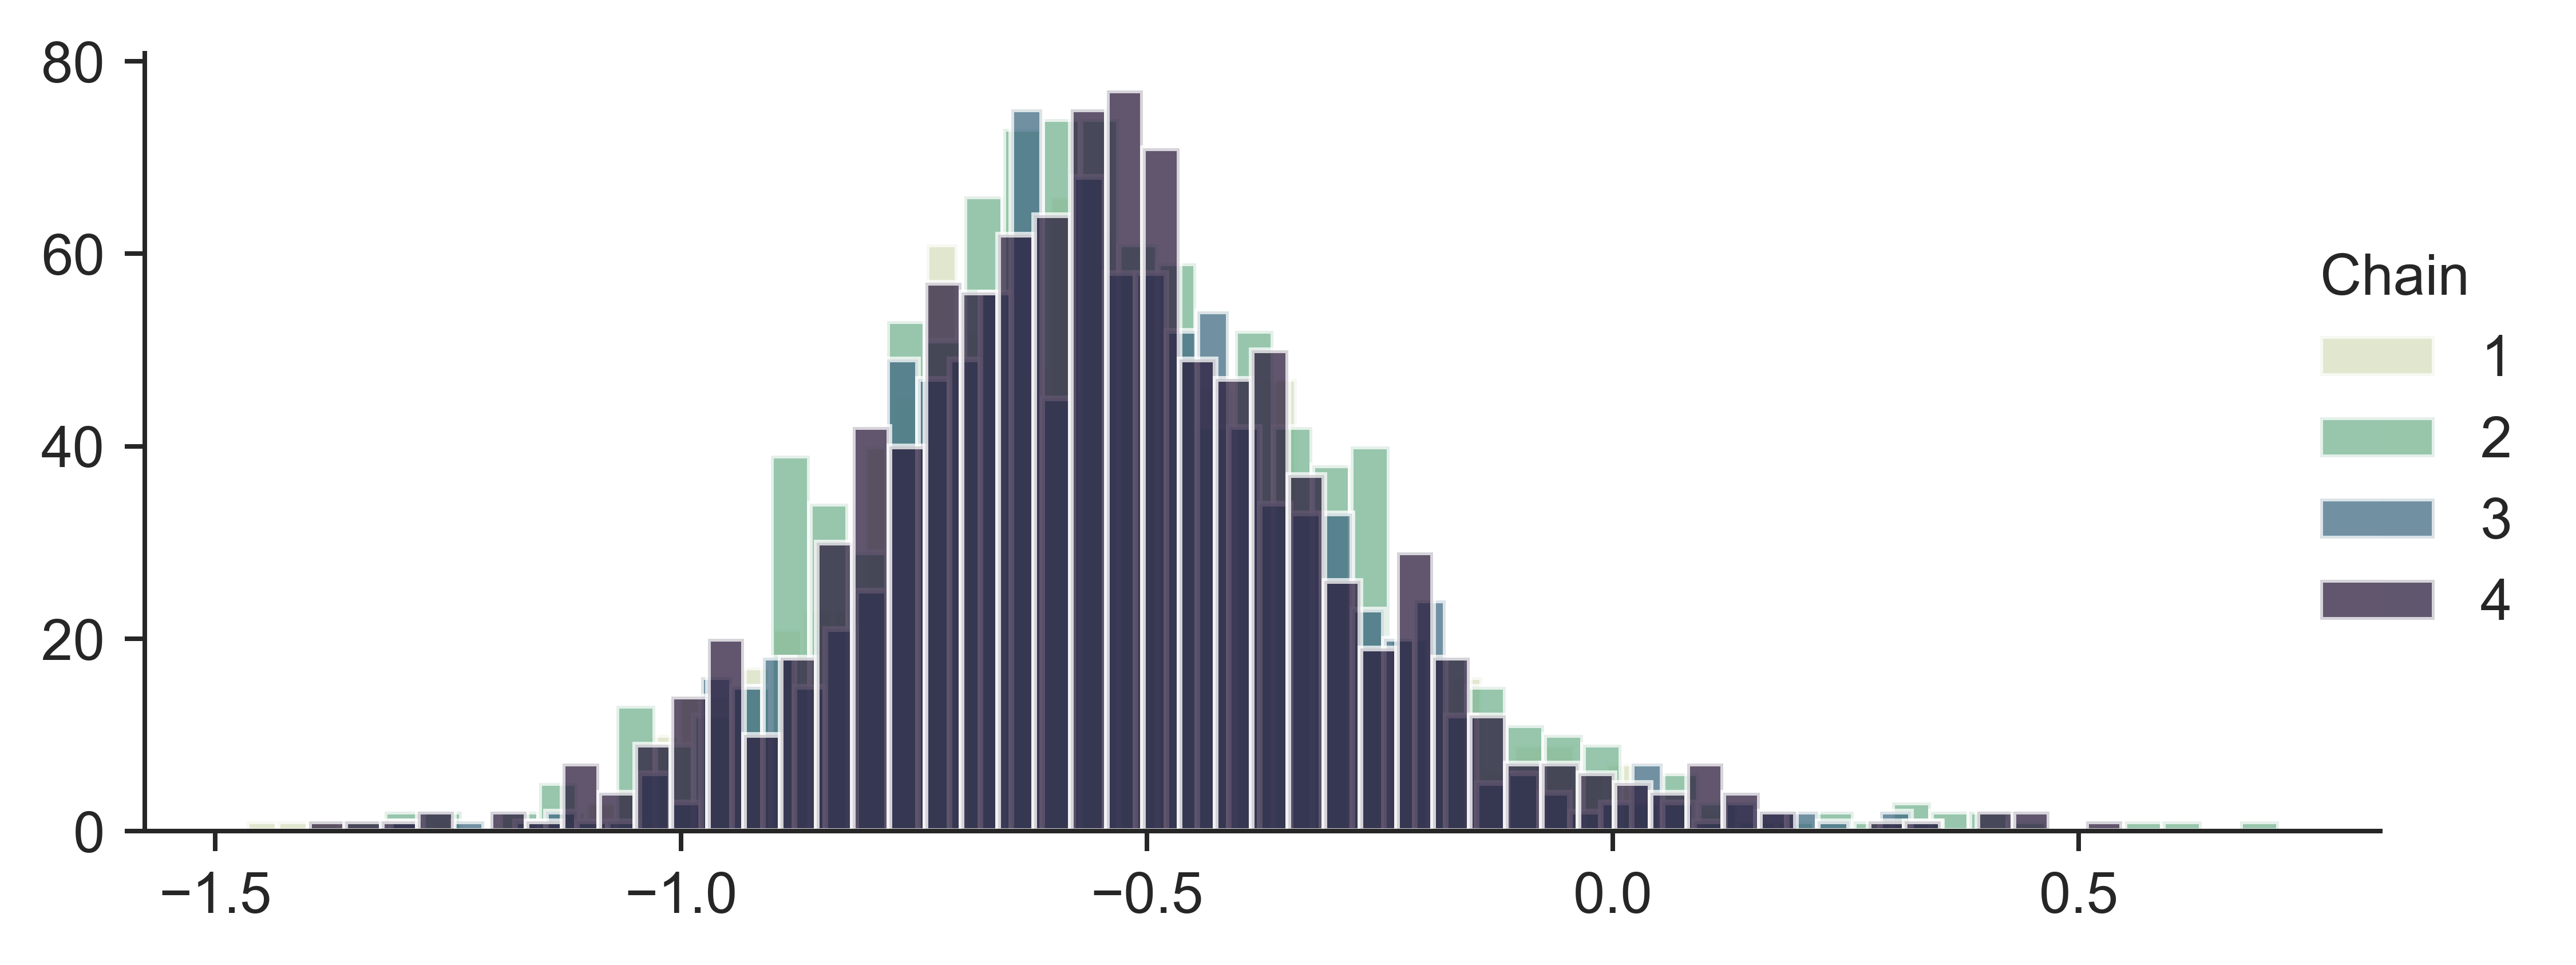

In [50]:
sp.plot_hist(trace, "gamma", 1, "");

In [39]:
data['gamma_essential']

array([-0.59391366])

In [40]:
data['gamma_nonessential']

array([-0.06117564])

In [37]:
data['beta']

array([-0.7259566 , -0.86215581,  0.15517627, -0.63656032])

In [26]:
numpy.mean(trace['beta'], 0)

array([-0.09957914, -0.57056228, -0.57036974, -0.78159899])

In [42]:
data['l']

array([ 0.43620294, -0.19030173,  0.07975977, -0.06234259,  0.36552698,
       -0.51503518, -0.0806043 , -0.09601359])

In [53]:
numpy.mean(trace['l'], 0)

array([ 0.20414632, -0.21608382, -0.05305349, -0.22530571,  0.55608233,
       -0.20224196, -0.04998647, -0.18432432])

In [54]:
## Simple model

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


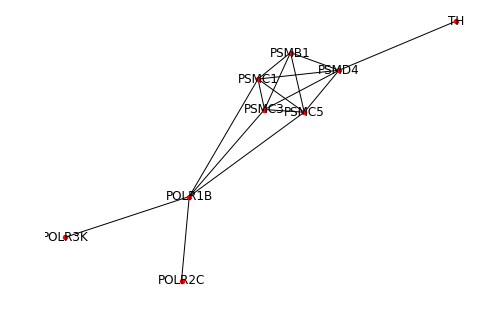

In [52]:
networkx.draw(graph.subgraph(data['essential_genes']), with_labels=True, node_size=20)